In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mth

# Flujo de Muones 
REF: rpp2020-rev-cosmic-rays, 30.3.1 Muons, Eq.(30.4), válido para $E_{\mu} > 100 GeV$, ángulo del cenit $\theta$ > 70.
* Formula de Gaisser o Parametrización de Gaisser

In [52]:
def GaisserFlux(muonEnergy, theta):
    Emu   = muonEnergy
    costh = mth.cos(theta)
    pion = 1./(1 + 1.1 * Emu * costh / 115);
    kaon = 0.054/(1 + 1.1 * Emu * costh/850);
    flux  = 0.14 * (pion + kaon);
    return flux 

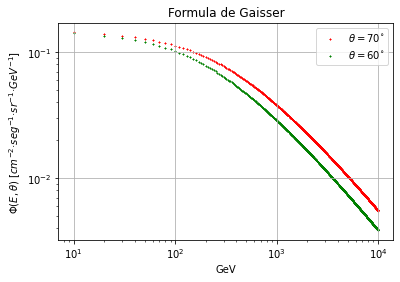

In [54]:
# datos del gráfico
x = np.linspace(1e1,1e4,1000)# energía {1e1,1e4}
th1 = 70*mth.pi/180          # grados -> rads, θ = 70°
th2 = 60*mth.pi/180          # grados -> rads, θ = 00°
flx1 = GaisserFlux(x,th1)    # flujo θ = 70°
flx2 = GaisserFlux(x,th2)    # flujo θ = 60°

fig, ax = plt.subplots()     # init fig.
ax.scatter(x,flx1,s=1,marker='x',color='r') # gráfica
ax.scatter(x,flx2,s=1,marker='x',color='g') # gráfica
ax.loglog()                         # xy loglog
#ax.set_ylim(y.min(),y.max())        # límites y
ax.set_title('Formula de Gaisser')  # título
ax.set_xlabel('GeV')                # eje x
ax.set_ylabel(r"$\Phi(E,\theta) \ [cm^{-2}·seg^{-1}·sr^{-1}·GeV^{-1}]$ ") # eje y
plt.grid()                          # rejilla
plt.legend([r"$\theta=70^{\circ}$",
            r"$\theta=60^{\circ}$"])# θ=70°,60°
plt.show()


# Flujo Muones 2
REF: arXiv:1509.06176v1, -> Eq.(3) y REF: https://doi.org/10.3389/fenrg.2021.750159 
* Parametrización modificada Gaisser, del flujo de muones al nivel del mar.
* Válido para flujo con E de 0.5 a 6000 GeV y para ángulos pequeños

In [130]:
def GaisserMod(muonEnergy, theta):
    p1 = 0.102573
    p2 = -0.068287
    p3 = 0.958633
    p4 = 0.0407253
    p5 = 0.817285
    
    costh = mth.cos(theta)
    costhStar2 = (costh**2 + p1**2 + p2*pow(costh,p3) + p4*pow(costh,p5))/(1+(p1**2)+p2+p4)
    costhStar  = mth.sqrt(costhStar2)
    Emu = muonEnergy # E -> GeV
    pion = 1/(1+1.1*Emu*costhStar/115)
    kaon = 0.054/(1+1.1*Emu*costhStar/850)
    flux = 0.14*pow(Emu*(1+3.64/(Emu*pow(costhStar,1.29))),-2.7)*(pion+kaon)
    
    return flux 

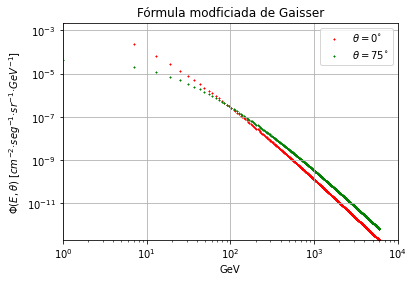

In [154]:
# datos del gráfico
Em = np.linspace(1,6e3,1000)# energía {1e1,1e4}
th1 = 0*mth.pi/180      # grados -> rads, θ = 0°
th2 = 75*mth.pi/180      # grados -> rads, θ = 75°
flx1 = GaisserMod(Em,th1) # flujo θ = 0°
flx2 = GaisserMod(Em,th2) # flujo θ = 75°

fig, ax = plt.subplots() # init fig.
ax.scatter(Em,flx1,s=1,marker='x',color='r') # gráfica
ax.scatter(Em,flx2,s=1,marker='x',color='g') # gráfica
ax.loglog()                         # xy loglog
ax.set_xlim(1,1e4)                  # límites c
ax.set_ylim(flx1.min(),flx1.max())  # límites y
ax.set_title('Fórmula modficiada de Gaisser')  # título
ax.set_xlabel('GeV')                # eje x
ax.set_ylabel(r"$\Phi(E,\theta)\ [cm^{-2}·seg^{-1}·sr^{-1}·GeV^{-1}]$ ") # eje y
plt.grid()                          # rejilla
plt.legend([r"$\theta=0^{\circ}$",
            r"$\theta=75^{\circ}$"])# θ=0°,75°
plt.show()
